https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/comments#1236924

In [1]:
import yfinance as yf  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ticker= 'SPY'
ticker= 'QQQ'
ticker= 'NVDA'
ticker= 'AMD'
# ticker= 'DOGE-USD'
# ticker= 'ETH-USD'
ticker= 'BTC-USD'


df = yf.download(ticker,'2011-01-01')
# df = df[['Adj Close']]
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,58964353058
2021-06-23,32515.714844,34753.410156,31772.632812,33723.027344,33723.027344,46317108925
2021-06-24,33682.800781,35228.851562,32385.214844,34662.437500,34662.437500,33123368116
2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,40230904226
2021-06-27,31389.406250,32592.980469,30184.501953,32287.523438,32287.523438,38650970112


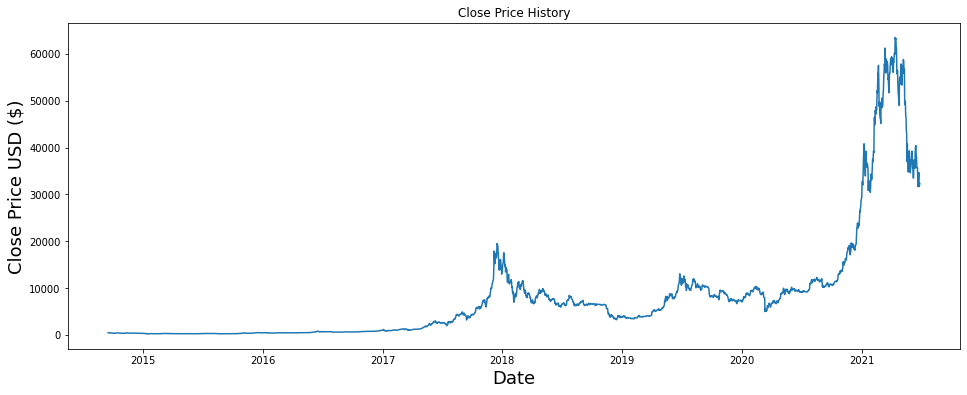

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2348

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.5445581 ],
       [0.49679432],
       [0.50705473]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.00311667, 0.00329791, 0.00324534,
       0.00311043, 0.00286471, 0.00238077, 0.00224882, 0.00239992,
       0.00249638, 0.00276093, 0.00295179, 0.00289709, 0.00290872,
       0.00316534, 0.0033527 , 0.00351782, 0.00342154, 0.00322861,
       0.00324759, 0.00336893, 0.00333899, 0.00323318, 0.0032905 ,
       0.00323812, 0.00284742, 0.00284628, 0.00267141, 0.00278879,
       0.00276171, 0.0028348 , 0.00248697, 0.00264036, 0.00253008,
       0.00233155, 0.0023338 , 0.00236005, 0.00240645, 0.00254847,
       0.00270329, 0.00259473, 0.00264325, 0.00292396, 0.00298176,
       0.00299394, 0.00387614, 0.00383151, 0.00346962, 0.00312718])]
[0.0033127172346353144]

[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2288/2288 [==============================] - 146s 60ms/step - loss: 8.7578e-04


In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3936.28203675238

<ipython-input-9-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


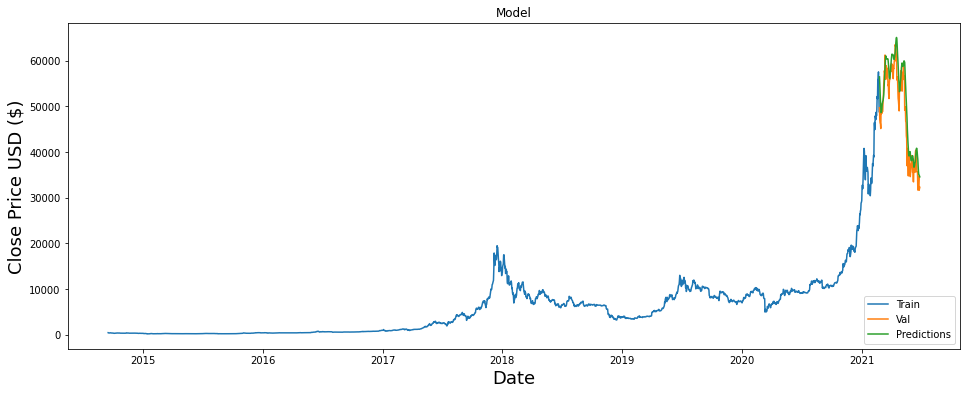

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<AxesSubplot:xlabel='Date'>

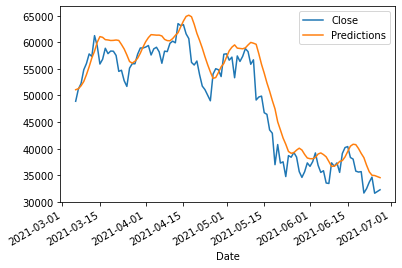

In [10]:
valid[10:].plot()